Importing

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading Iris dataset

In [13]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Calculating Z score on "sepal_width"

In [33]:
column_name = "sepal_width"
mean_val = df[column_name].mean()
std_val = df[column_name].std()
df['z_score'] = (df["sepal_width"] - mean_val) / std_val
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,z_score
0,5.1,3.5,1.4,0.2,setosa,1.015602
1,4.9,3.0,1.4,0.2,setosa,-0.131539
2,4.7,3.2,1.3,0.2,setosa,0.327318
3,4.6,3.1,1.5,0.2,setosa,0.097889
4,5.0,3.6,1.4,0.2,setosa,1.245030


In [19]:
zscore_threshold = 3
outlier_mask = np.abs(df['z_score']) > zscore_threshold
print("Number of outliers: ", outlier_mask.sum())

Number of outliers:  1


Dataset of with and without outlier

In [24]:
df_outliers = df[outlier_mask]
df_no_outliers = df[~outlier_mask]
print("Outlier")
print(df_outliers.head())
print("Without outlier")
print(df_no_outliers.head())

Outlier
    sepal_length  sepal_width  petal_length  petal_width species   z_score
15           5.7          4.4           1.5          0.4  setosa  3.080455
Without outlier
   sepal_length  sepal_width  petal_length  petal_width species   z_score
0           5.1          3.5           1.4          0.2  setosa  1.015602
1           4.9          3.0           1.4          0.2  setosa -0.131539
2           4.7          3.2           1.3          0.2  setosa  0.327318
3           4.6          3.1           1.5          0.2  setosa  0.097889
4           5.0          3.6           1.4          0.2  setosa  1.245030


Quick summary

In [25]:
print(f"--- Outlier Detection Summary ({column_name}) ---")
print(f"Original Data Points: {len(df)}")
print(f"Calculated Mean: {mean_val:.2f} mm")
print(f"Calculated Standard Deviation: {std_val:.2f} mm")
print(f"Z-Score Threshold: |Z| > {zscore_threshold}")
print(f"Outliers Found: {len(df_outliers)}")
print(f"Clean Data Points: {len(df_no_outliers)}\n")
print(f"Outlier Data Points:\n{df_outliers[[column_name, 'z_score']]}")

--- Outlier Detection Summary (sepal_width) ---
Original Data Points: 150
Calculated Mean: 3.06 mm
Calculated Standard Deviation: 0.44 mm
Z-Score Threshold: |Z| > 3
Outliers Found: 1
Clean Data Points: 149

Outlier Data Points:
    sepal_width   z_score
15          4.4  3.080455


Histogram with outlier

<Axes: xlabel='sepal_width', ylabel='Count'>

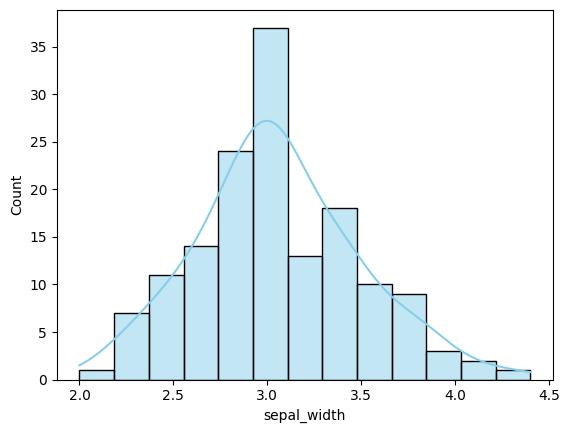

In [29]:
sns.histplot(df[column_name], kde=True, color='skyblue')

Histogram without outlier

<Axes: xlabel='sepal_width', ylabel='Count'>

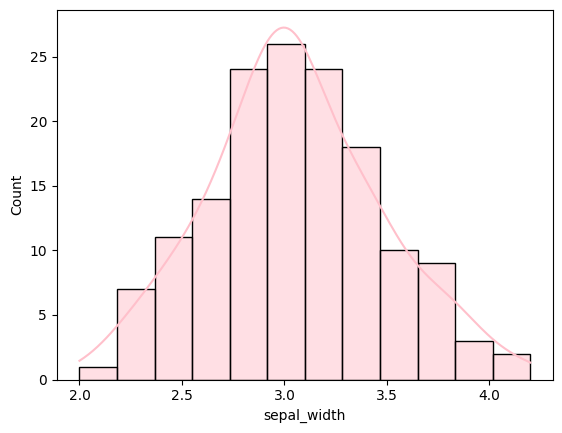

In [34]:
sns.histplot(df_no_outliers[column_name], kde=True, color='pink')
